In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
penguins_df = pd.read_csv("noisy_datasets/penguins.csv")
diamonds_df = pd.read_csv("noisy_datasets/diamond.csv")
epicurious_df = pd.read_csv("noisy_datasets/epicurious.csv")

print("Penguin Data \n", penguins_df.describe())
print("\nDiamond Data \n", diamonds_df.describe())
print("\nEpicurious Dataset\n", epicurious_df.describe())

Penguin Data 
        calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.

In [3]:
penguins_df.info()
penguins_df = penguins_df.dropna(subset=['species', 'island', 'gender'])
penguins_df = penguins_df.fillna(penguins_df.select_dtypes(include='number').mean())
penguins_df[['species', 'island', 'gender']] = penguins_df[['species', 'island', 'gender']].applymap(str.lower)
penguins_df = penguins_df.dropna(subset=['species', 'island', 'gender'])
penguins_df = penguins_df.fillna(penguins_df.select_dtypes(include='number').mean())
penguins_df[['species', 'island', 'gender']] = penguins_df[['species', 'island', 'gender']].applymap(str.lower)
Q1 = penguins_df.quantile(0.25)
Q3 = penguins_df.quantile(0.75)
IQR = Q3 - Q1
outliers = (penguins_df < (Q1 - 1.5 * IQR)) | (penguins_df > (Q3 + 1.5 * IQR))
for column in penguins_df.select_dtypes(include='number').columns:
    penguins_df[column] = penguins_df[column].where(~outliers[column], penguins_df[column].median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


/var/folders/xj/24kvg1ds7mv3ntbbfv1kwrlh0000gn/T/ipykernel_88632/226543593.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (penguins_df < (Q1 - 1.5 * IQR)) | (penguins_df > (Q3 + 1.5 * IQR))


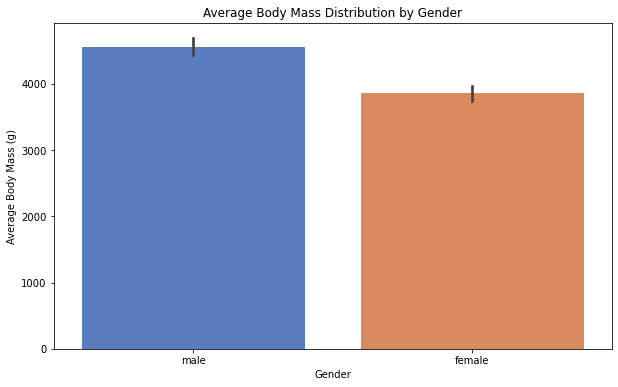

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='body_mass_g', data=penguins_df, estimator=np.mean, palette='muted')
plt.title('Average Body Mass Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Body Mass (g)')
plt.show()

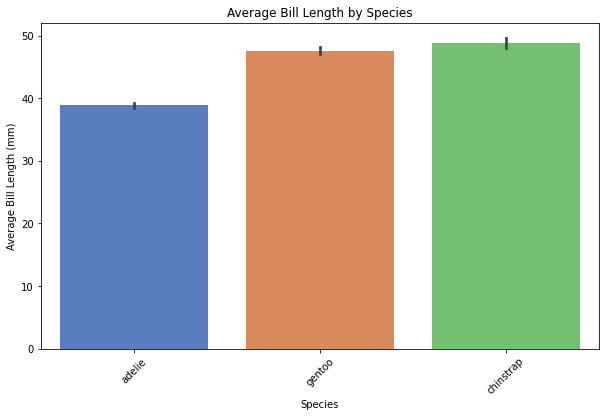

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='bill_length_mm', data=penguins_df, estimator=np.mean, palette='muted')
plt.title('Average Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Bill Length (mm)')
plt.xticks(rotation=45)
plt.show()


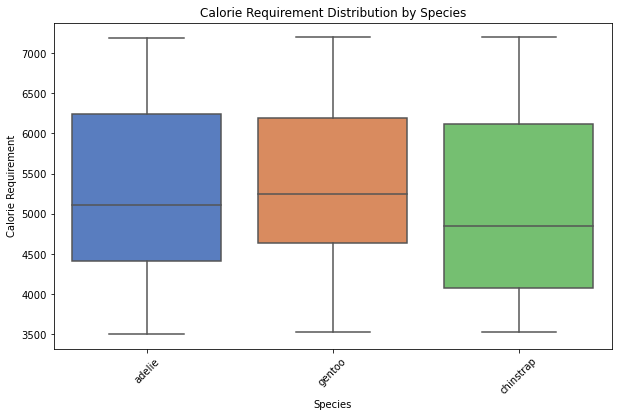

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='calorie requirement', data=penguins_df, palette='muted')
plt.title('Calorie Requirement Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Calorie Requirement')
plt.xticks(rotation=45)
plt.show()


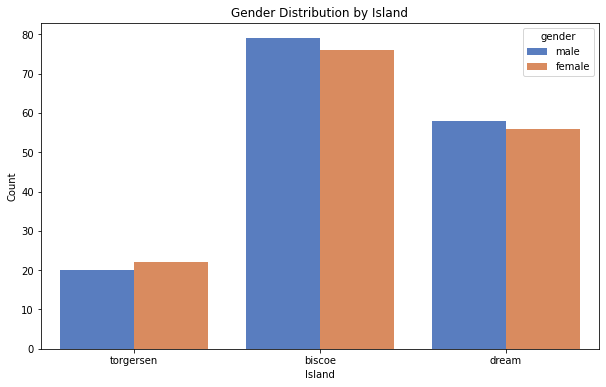

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='gender', data=penguins_df, palette='muted')
plt.title('Gender Distribution by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()


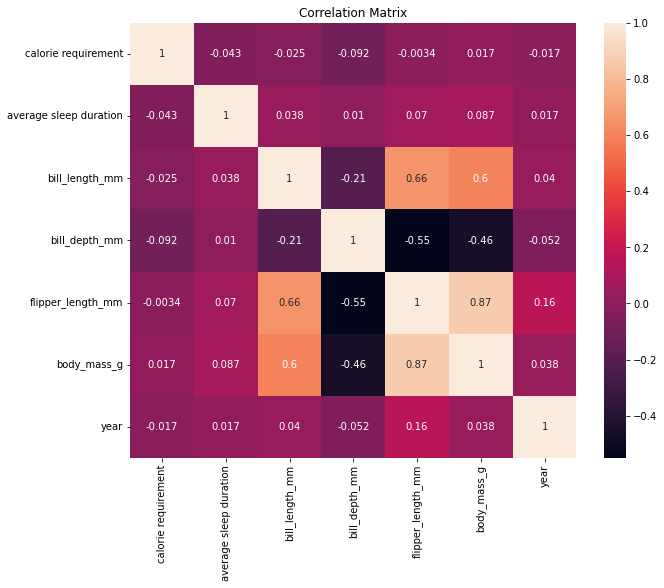

In [8]:
correlation_matrix = penguins_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
penguins_df = pd.get_dummies(penguins_df, columns=['species', 'island'], drop_first=False)
penguins_df['gender_target'] = penguins_df['gender'].map({'female': 0, 'male': 1})
correlation_matrix = penguins_df.corr()
target_correlation = correlation_matrix['gender_target']
print(target_correlation)
threshold = 0.1 
low_correlation_features = target_correlation[target_correlation.abs() < threshold].index.tolist()
print(low_correlation_features)
corelated_df = penguins_df.drop(columns=low_correlation_features)
corelated_df.head(5)

calorie requirement      -0.015871
average sleep duration    0.083965
bill_length_mm            0.364078
bill_depth_mm             0.368999
flipper_length_mm         0.273502
body_mass_g               0.436622
year                      0.003394
species_adelie           -0.021469
species_chinstrap         0.003139
species_gentoo            0.019557
island_biscoe             0.009678
island_dream              0.006008
island_torgersen         -0.022629
gender_target             1.000000
Name: gender_target, dtype: float64
['calorie requirement', 'average sleep duration', 'year', 'species_adelie', 'species_chinstrap', 'species_gentoo', 'island_biscoe', 'island_dream', 'island_torgersen']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,gender_target
0,39.1,18.7,181.0,3750.0,male,1
1,39.5,17.4,186.0,3800.0,female,0
2,40.3,18.0,195.0,3250.0,female,0
4,36.7,19.3,193.0,3450.0,female,0
5,39.3,20.6,190.0,3650.0,male,1


In [13]:
non_categorical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
min_values = corelated_df[non_categorical_columns].min()
max_values = corelated_df[non_categorical_columns].max()
corelated_df[non_categorical_columns] = (corelated_df[non_categorical_columns] - min_values) / (max_values - min_values)


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0        0.254545       0.666667           0.152542     0.291667    male   
1        0.269091       0.511905           0.237288     0.305556  female   
2        0.298182       0.583333           0.389831     0.152778  female   
4        0.167273       0.738095           0.355932     0.208333  female   
5        0.261818       0.892857           0.305085     0.263889    male   

   gender_target  
0              1  
1              0  
2              0  
4              0  
5              1  
